# waves

In [73]:
#import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pandas as pd
from IPython.display import display

**main variables**
<br> f - main frequency (Hz)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.

In [74]:
f=200
frangemax=400
samples=2000
randamp=7

x = np.linspace(0.0, 1, samples)
s_det = np.sin(f*2*np.pi*x)
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)/(0.5*randamp+1)

The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - 1 range. The zooming is exponential. Value 0 displays the whole range.

In [75]:
usewidgets=0
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=20

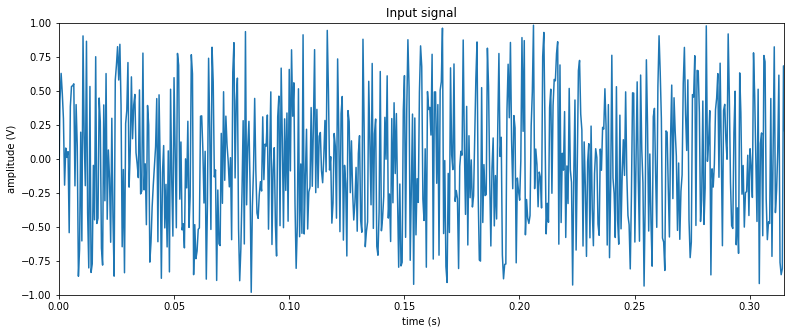

In [76]:
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
yaxismax=1/2**(view.value/12)
plt.axis([0,yaxismax,-1,1])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

yf = scipy.fftpack.fft(s)
xf = np.linspace(0.0, frangemax, frangemax)
nyquist=samples/2

## Fourier transform and examining it
<br>Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

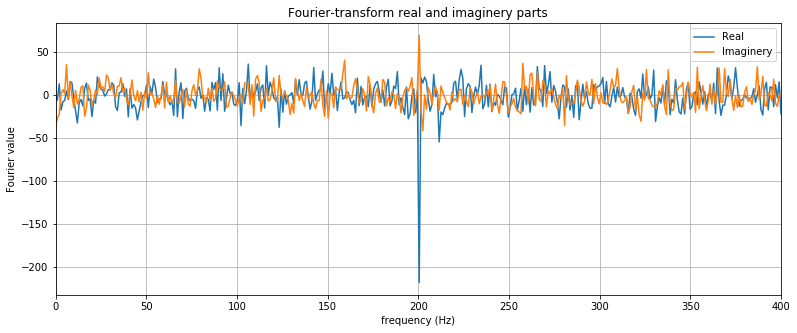

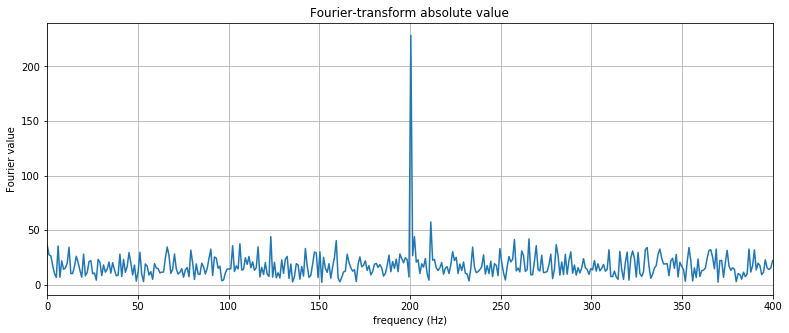

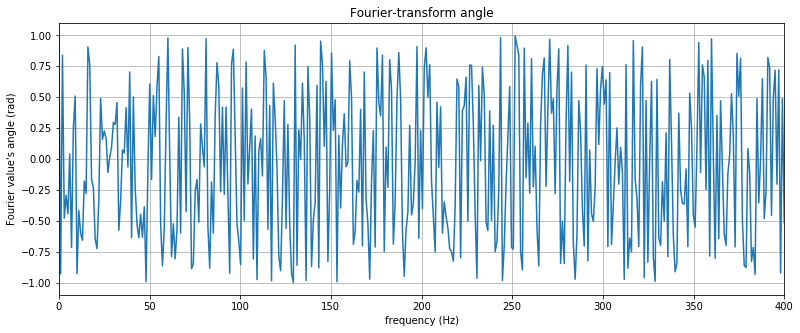

In [77]:
yfabs=np.abs(yf[:frangemax])
yfang=np.angle(yf[:frangemax])
yfimag=np.imag(yf[:frangemax])
yfreal=np.real(yf[:frangemax])

plt.figure(figsize=(13,5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform real and imaginery parts')
plt.grid(True)
plt.legend(('Real', 'Imaginery'))
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfang/np.pi)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)') 
plt.ylabel("Fourier value's angle (rad)")
#plt.xscale('log')
plt.title('Fourier-transform angle')
plt.grid(True)
plt.show()

Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [78]:
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    yfmaxsum=yfmaxsum+yfsort[frangemax-i-1]
    for j in range(frangemax):
        if yfsort[frangemax-i-1] == yfabs[j]:
            fout[i]=j
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 'Fourier amplitude': [yfabs[fout[0]],yfabs[fout[1]],yfabs[fout[2]],yfabs[fout[3]],yfabs[fout[4]]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[fout[0]]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[fout[0]]*yfabs[fout[0]]/yfsum
   
if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
#    print ('\nConfidence using square sum:', 100*certainity2, '%')
#    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

,Frequency (Hz),Fourier amplitude
0,200,228.471532
1,211,57.448623
2,202,43.963060
3,123,43.918037
4,265,41.988625


We have succesfully found our original frequency: 200 Hz


Now, we will F-transform the deterministic and stohastic component of our signal separatly, and compare them.

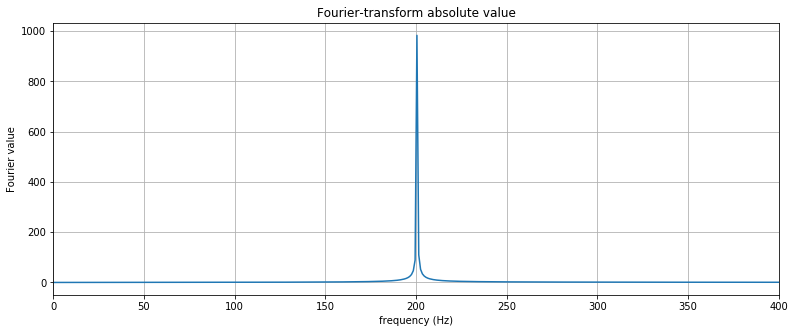

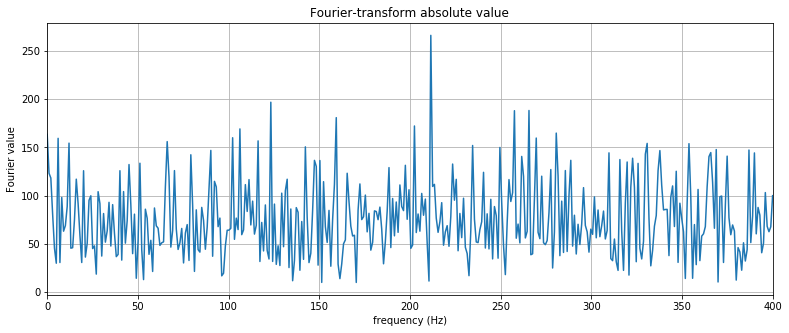

In [79]:
yf_det=scipy.fftpack.fft(s_det)
yf_det_abs=np.abs(yf_det[:frangemax])
yf_noise=scipy.fftpack.fft(s_noise)
yf_noise_abs=np.abs(yf_noise[:frangemax])

plt.figure(figsize=(13,5))
plt.plot(xf,yf_det_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yf_noise_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

Now, we will take the original Fourier-result, and the sum of the two component-Fouriers, and compare them: We will divide them, and see, that the result graph has two "limits", one conventional, and a smooth, Gaussian-like one, the actual values fluctuate between theese two. Next, scale one of them with this limit, and we see that they are really similar. How similar? We subtract them, and see, that this function also has two "limits", one is 0, other is a hyperbolic-looking function, peeking at f, where the original fourier peeks. Is this a coincidence? [drawing](https://i.redd.it/nnlrafulz5701.jpg)

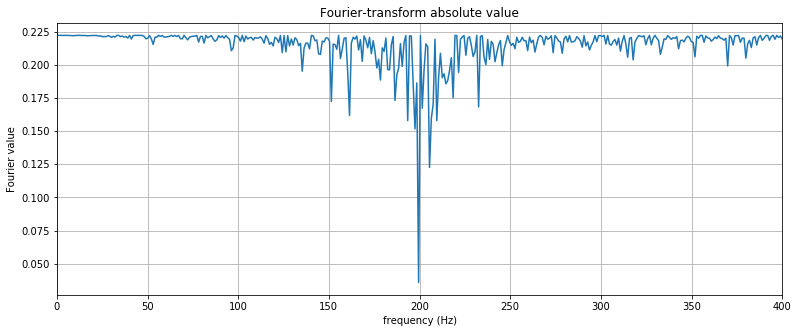

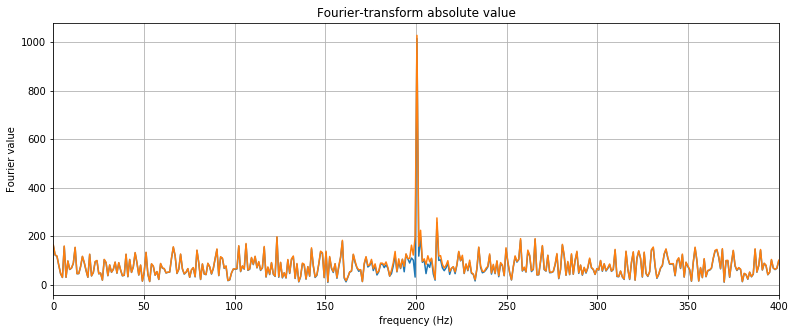

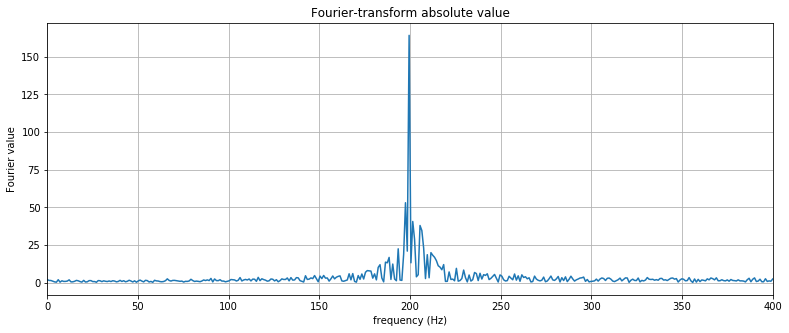

In [80]:
plt.figure(figsize=(13,5))
plt.plot(xf,yfabs/(yf_det_abs+yf_noise_abs))
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs/0.225,xf,(yf_det_abs+yf_noise_abs))
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,(yf_det_abs+yf_noise_abs)-yfabs/0.225)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

Other signals (Just for fun)

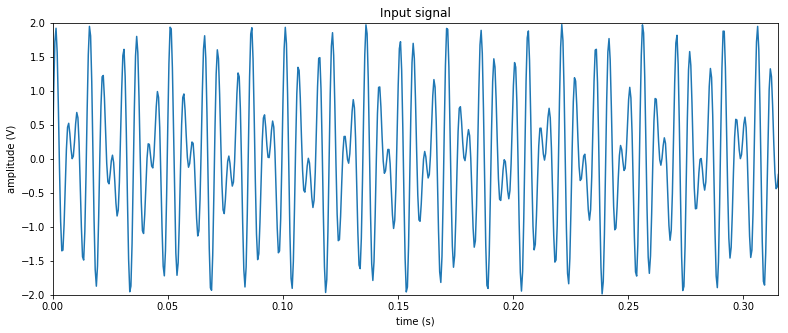

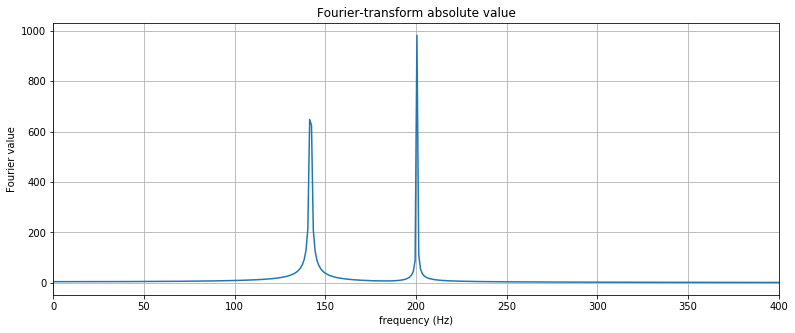

Peaks supposed: 200 and 141.42135623730948 Hz 
They are at: 200 141 and 142 Hz


In [81]:
f1=f
f2=f/np.sqrt(2)
s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
yaxismax=1/2**(view.value/12)
plt.axis([0,yaxismax,-2,2])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

yf = scipy.fftpack.fft(s)
yfabs=np.abs(yf[:frangemax])

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

yfsort=np.sort(yfabs,axis=None)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    yfmaxsum=yfmaxsum+yfsort[frangemax-i-1]
    for j in range(frangemax):
        if yfsort[frangemax-i-1] == yfabs[j]:
            fout[i]=j

print ('Peaks supposed:', f1 ,'and', f2, 'Hz \nThey are at:' ,fout[0], fout[1], 'and',fout[2], 'Hz')

## Tasks
<br> Noise and det. component F-transform
<br> Fourier dimension - ()
<br> make Git ignore - looked it up, don't know why/how should we use it